# 1. 언어 모델
# 1-1. 언어 모델이란?
- 단어 시퀀스에 확률을 할당하여 가장 자연스러운 단어 시퀀스를 찾아내는 모델
- 이전 단어들이 주어졌을 때 다음 단어를 예측하도록 훈련
- Machine Translation
- Spell Correction
- 통계 기반: 등장 빈도 기반으로 확률 계산(N-gram, Perplexity)
- 인공 신경망 기반: 단어를 벡터로 표현하고 NN을 이용해 다음 단어 예측(RNN, LSTM, GRU, Transformer)

## 1-2. SLM(통계적 언어 모델)
### Statistic Language Model
- Destiributional Hypothesis: 비슷한 문맥에서 함께 나타나는 단어들은 비슷한 의미를 가진다.
    - 어떤 단어 주변에 자주 등장하는 단어를 통해 그 단어의 의미를 짐작할 수 있다.
    - 조건부 확률, 카운트 기반 확률로 설명할 수 있다.

**1. 조건부 확률**: P(A)와 P(B)가 있을 때, A의 발생 전제 하에 B의 발생 확률
- `P(B|A) = P(A, B) / P(A)`
- `P(A, B) = P(A) * P(B|A)`
- 단어의 다음 단어를 순차적으로 예측하는 과정을 통해 문장 전체가 자연스러운지 판단한다.
- 확률값이 높을 수록 더 자연스럽다.

**2. 카운트 기반 확률**: 등장 빈도를 통해 다음 단어 확률 계산
- 확률은 학습 데이터에서 실제 단어의 count를 세어 계산

<br><br>
`-` Sparsity Problem: 데이터가 부족해서 언어를 정확하게 모델링하지 못하는 문제
- 매우 자연스러운 문장이어도 데이터에 없어 잘못된 문장이라 판단할 수 있음
- 분모가 0이 되는 경우가 발생할 수 있음. 새로운 문맥에 대응할 수 없다.
> 통계 기반 > 인공 신경망 기반

### (2) N-gram
- SLM에 속하지만, 일부 단어만 참고하여 희소 문제를 완화하려 함
- 참고하는 단어가 많을수록 코퍼스에서 해당 시퀀스를 찾기 어렵기 때문에, 참고하는 단어의 수를 줄여보려는 것
- 참고하는 단어의 범위를 N개로 정하여 확률을 계산하는 방식
<br><br>
- N-gram: 연속된 n개의 단어 시퀀스
- n-1개의 단어만 참고한다.
    - 4-gram에서 "오늘 상쾌한 날씨가 좋다"라는 문장의 '좋다' 다음 단어를 예측할 때, '상쾌한 날씨가 좋다'만 참고한다.
<br><br>

`한계` 여전히 희소 문제와 문맥 파악의 한계를 극복하지 못함

### (3) Perplexity(PPL)
- test data를 이용해 모델의 성능을 빠르고 정량적으로 평가하기 위한 지표이다.
- 혼란스러워하는(헷갈리는) 정도
- 낮을수록 좋다.

1. PPL의 정의와 수식
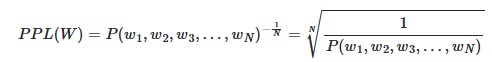
    - 문장 W의 확률에 역수를 취한 후 N 제곱근을 한 값
    - W: 평가 대상 문장
    - N: W에 포함된 단어 총 수
    - P(W): 모델이 문장 W에 부여하는 확률
    - `P(W)`가 높아질수록 문장은 자연스럽고, PPL은 낮아짐.

2. PPL에 영향을 주는 요인들
- W의 희소성: W가 희소하게 등장할수록 PPL이 커진다.
- 문장의 길이(N): N이 커지면 PPL을 낮춰준다.
- PPL: 선택 가능한 경우의 수
    - PPL이 10이면 10개의 단어 중 무엇이 정답일지 헷갈려 한다는 뜻이다.
> PPL이 낮다 = 덜 혼란스러워 한다 = 문맥을 더 잘 이해한다 = 모델 성능이 좋다.
- SLM은 Sparsirt Problem이라는 근본적 한계를 가지기 때문에 PPL이 높게 나올 수밖에 없다.
- 반면, 딥러닝 기반 모델은 일반화하는 능력이 뛰어나 유연하게 대처할 수 있다.

## 1-3. 딥러닝 기반 언어모델
### (1) LLM(Large Language Model)
- 어마어마하게 큰 언어 모델이다. 학습 데이터의 양과 모델 복잡성이 상상을 초월한다.
- AI는 LLM과 여타 프로그램을 결합한 실제 서비스
- GPT-3, ChatGPT, GPT-4, LLaMA, PALM, Bard, Gemini 등
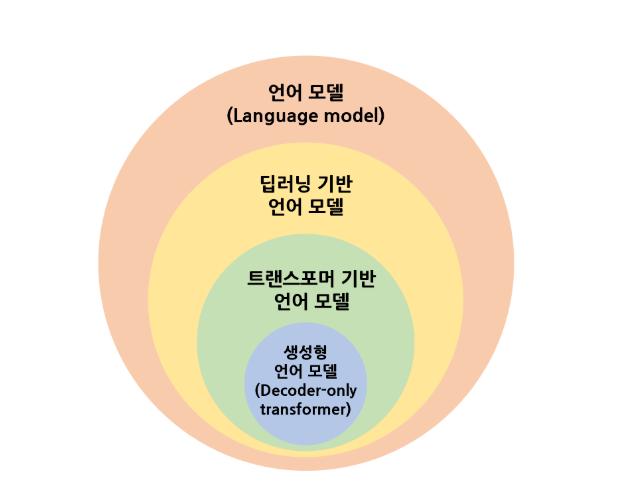

1. LLM의 작동 방식
- 대규모 학습(Training): 언어의 패턴을 스스로 터득한다.
- 예측 및 생성 (Prediction & Generation): 학습된 패턴을 기반으로 가장 확률이 높은 단어를 순서대로 예측하며 답을 생성한다.

2. LLM 사용 사례
- 텍스트 생성
- 기계 번역: 문맥과 뉘앙스를 고려하여 번역 가능
- 질의응답: 질문의 의도를 파악하고, 관련성 높은 답을 찾아 제공
- 문서요약: 긴 문서에서 핵심만 간추려 짧은 요약문으로 압축 가능
- 감정 분석

### (2)-1 BERT란?
1. 개념
- Bidirectional Encoder Representations from Transformers
- 텍스트의 앞뒤 문맥을 동시에 고려해서, 입력값을 벡터로 바꿔주는, 딥러닝 모델이다(트랜스포머의 인코더 부분을 활용해 만든 양방향 언어 모델).
- Google 검색 엔진, Google Assistant, 이메일 자동 분류(Gmail)

2. 특징
- 양방향: 문장의 앞뒤를 동시에 고려
- transformer 기반: encoder 부분만 사용(GPT는 decoder만)
- Pre-Training + Fine-Tuning: 일반적인 언어 능력을 배우고 특정 과제에 맞게 설정
    - Masked Language Model(MLM), Next Sentence Prediction(NSP)로 사전 학습

### (2)-2 BERT는 어떻게 학습할까?
1. BERT의 구조
- transformer의 encoder를 쌓아 올린 구조
    - Base: 12개, Large: 24개

2. 처리과정
- Input > Embedding > Encoder 12개 > Output
- Embedding: 단어를 숫자 벡터로 바꾸기
    - Token Embedding: 단어 자체
    - Segment Embedding: 2개 이상 문장에서 어떤 문장인지 구분
    - Position Embedding: 단어가 문장에서 몇 번째인지 위치 정보
    - 세 정보를 더해 하나의 입력 벡터

3. 사전학습(1): Masked Language Model(MLM)
- 문장의 단어를 일부 가리고, 맞히는 방식
- 마스킹 비율과 방식
    - input의 15% 정도를 랜덤 마스킹
    - 가리기, 바꾸기, 그대로 두기 방식을 섞어 사용한다.
    - 양방향 학습을 통해 MASK에만 의존하지 않을 수 있다.
    - 문맥을 좌우에서 동시에 이해할 수 있다. 언어의 문맥을 학습할 수 있다.

4. 사전학습(2): Next Sentence Prediction(NSP)
- 두 문장이 실제로 이어지는지 맞히기
- 문장 간 관계를 이해하기 위해서

> MLM: 단어를 가리고 문맥으로 맞히는 방식
> NSP: 두 문장이 실제 이어지는지 판단하는 방식

### (2)-3 BERT 이후의 모델?
1. RoBERTa
- BERT의 프로세스를 개선한 모델
- 주요 차이점
    - 더 거대한 데이터셋, 더 길게 학습
    - NSP 제거
    - batch 크기 및 lr 최적화
    - mask를 동적으로 변경
2. ALBERT(A Lite BERT)
- BERT의 경량화 버전
- 주요 차이점
    - 파라미터 공유
    - 임베딩 행렬 분해

### (3) GPT
- Generative Pre-trained Transformer, Open AI
1. GPT-1: 다량의 말뭉치를 활용하여 NLP task, 지도학습
2. GPT-2: 지도학습으로 fine tuning 제거, 범용 언어모델 가능
3. GPT-3: zero/one/few-shot 실험 진행, prompting 도입
4. GPT-4: 멀티모달 도입


- GPT는 transformer의 Decoder만 사용.
- Decoder의 Self-Attention은 Masked Attention으로 동작한다.
- 입력된 문장의 앞부분 단어를 기반으로 다음에 올 단어의 확률 분포 계산
- Autoregressive Language Model
- BERT는 양방향/이해 중심이었다면 GPT는 단방향/생성 중심이다.

### (3)-2 LLM의 한계
- Hallucination(환각): 사실과 다른 내용을 그럴듯하게 만들어내는 현상
- 업데이트 비용이 매우 큼

### (4) RAG
- Retrieval Augmented Generation
- 관련 정보를 먼저 찾고 최종 답변을 생성하는 구조

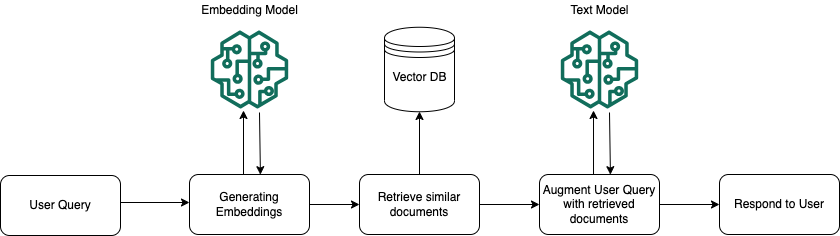
1. Query Encoder
    - 사용자의 질문 이해를 위해
    - 질문을 벡터로 인코딩
2. Knowledge Retriever
    - 인코딩 질문을 바탕으로 외부에서 관련 정보 검색
3. Knowledge-Augumented Generator
    - 검색 지식을 활용해 질문에 대한 답 생성
    - 검색된 추가 지식을 바탕으로 더 정확하고 풍부한 답 생성

- `+` 풍부한 정보 제공
- `+` 실시간 정보 반영
- `+` 환각 방지

- CAG(Credibilirt-Aware Generation)
    - RAG 한계 보완을 위한 프레임워크
    - 검색 문서의 신뢰성이 낮은 경우 답변 품질을 떨어뜨릴 수 있음
    - CAG는 문서의 신뢰도를 스스로 판단하고 활용할 수 있게 훈련시키는 기법이다.

### (5)-1 LangChain?
- LLM + RAG 직접 구현은 어려우니, 모델의 pipeline을 쉽게 구축할 수 있도록 도와준다.
- 필요한 구성 요소를 쉽게 연결할 수 있게 만든다. 레고라고 생각하자.

1. 추상화: LLM 서비스를 만들 때 필요한 작업들을 쉽게 표현하고 간소화할 수 있다.
2. 표준화: 비슷한 요소들을 같은 형식으로 표준화된 Document로 관리할 수 있다.
3. 체이닝: 컴포넌트를 쉽게 연결하여 로직을 파악할 수 있다. output을 |를 통해 바로 input으로 넣어주기
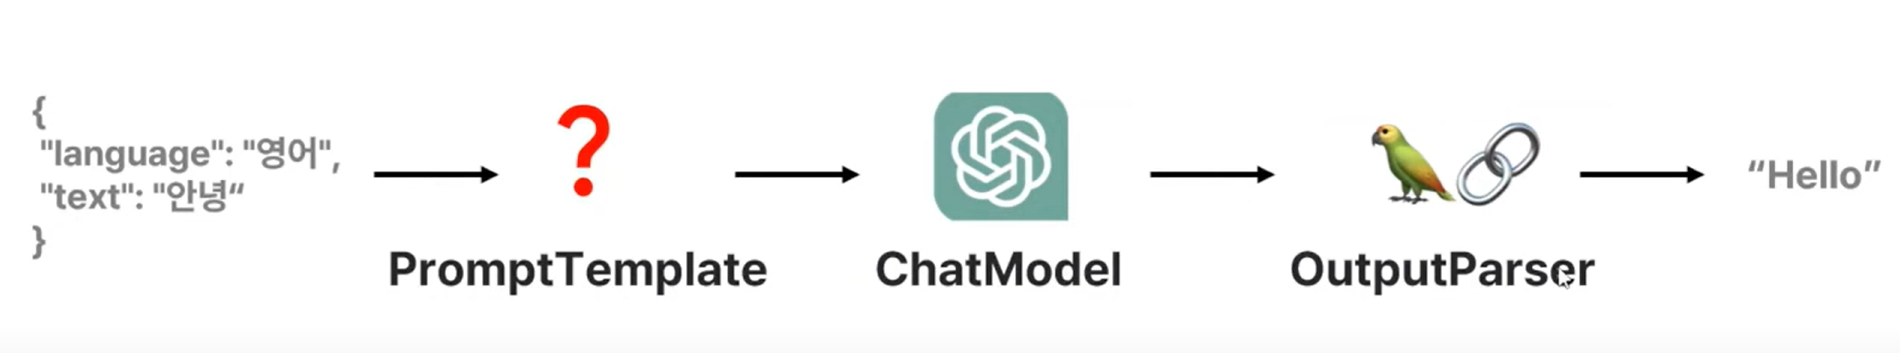

### (5)-2 LangGraph
- 랭체인은 중간에 다른 작업을 수행하거나, 이전 단계로 돌아갈 필요가 있는 경우 로직을 구현하기 어렵다.
- LangGraph는 비선형적 작업 형태로 Cycle, Loop을 구현할 수 있다.
    - node, edge를 통해 구현 가능
- LangChain: 작업 순서 고정, 복잡X, 빠름, 프로토타입
- LangGraph: 복잡한 자율 에이전트, 순환/반복, 고차원적 상태를 유지 및 관리해야 할 때

### (5)-3 LangSmith
- LLM 기반 앱을 위한 통합 개발 운영 플랫폼
- Debugging, Tracing: LLM의 실행 과정 시각화
- Testing, Evaluation: 성능 평가
- Monitoring: API, 시간, 사용량 등으로 최적화
- Prompt Hub

### (5)-4 외부 API
- LLM 내부 데이터만을 이용해서 해결할 수 없는 질문을 외부 API를 통해 답변 가능

## 1-4. sLM (small Language Model)
- LLM의 방대함 때문에 유발되는 문제를 극복하기 위해 탄생함
    - 비용, 데이터 유출 문제 등
- 모바일, 오프라인 환경 등에서 사용됨

### (1) 모델 압축
1. 가지치기
    - 중요도가 낮거나, 중복/불필요 매개변수를 제거하는 방법이다.
    - 숫자 가중치, 뉴런 자체, 신경망 계층의 파라미터를 가지치기
2. 양자화
    - 고정밀 데이터를 저정밀 데이터로 변환
    - 계산 부하 감소, 추론 속도 빠르게
3. 지식 증류
    - 더 큰 모델의 지식을 더 작은 모델로 증류(Distillation)한다.


### (2) sLM의 예
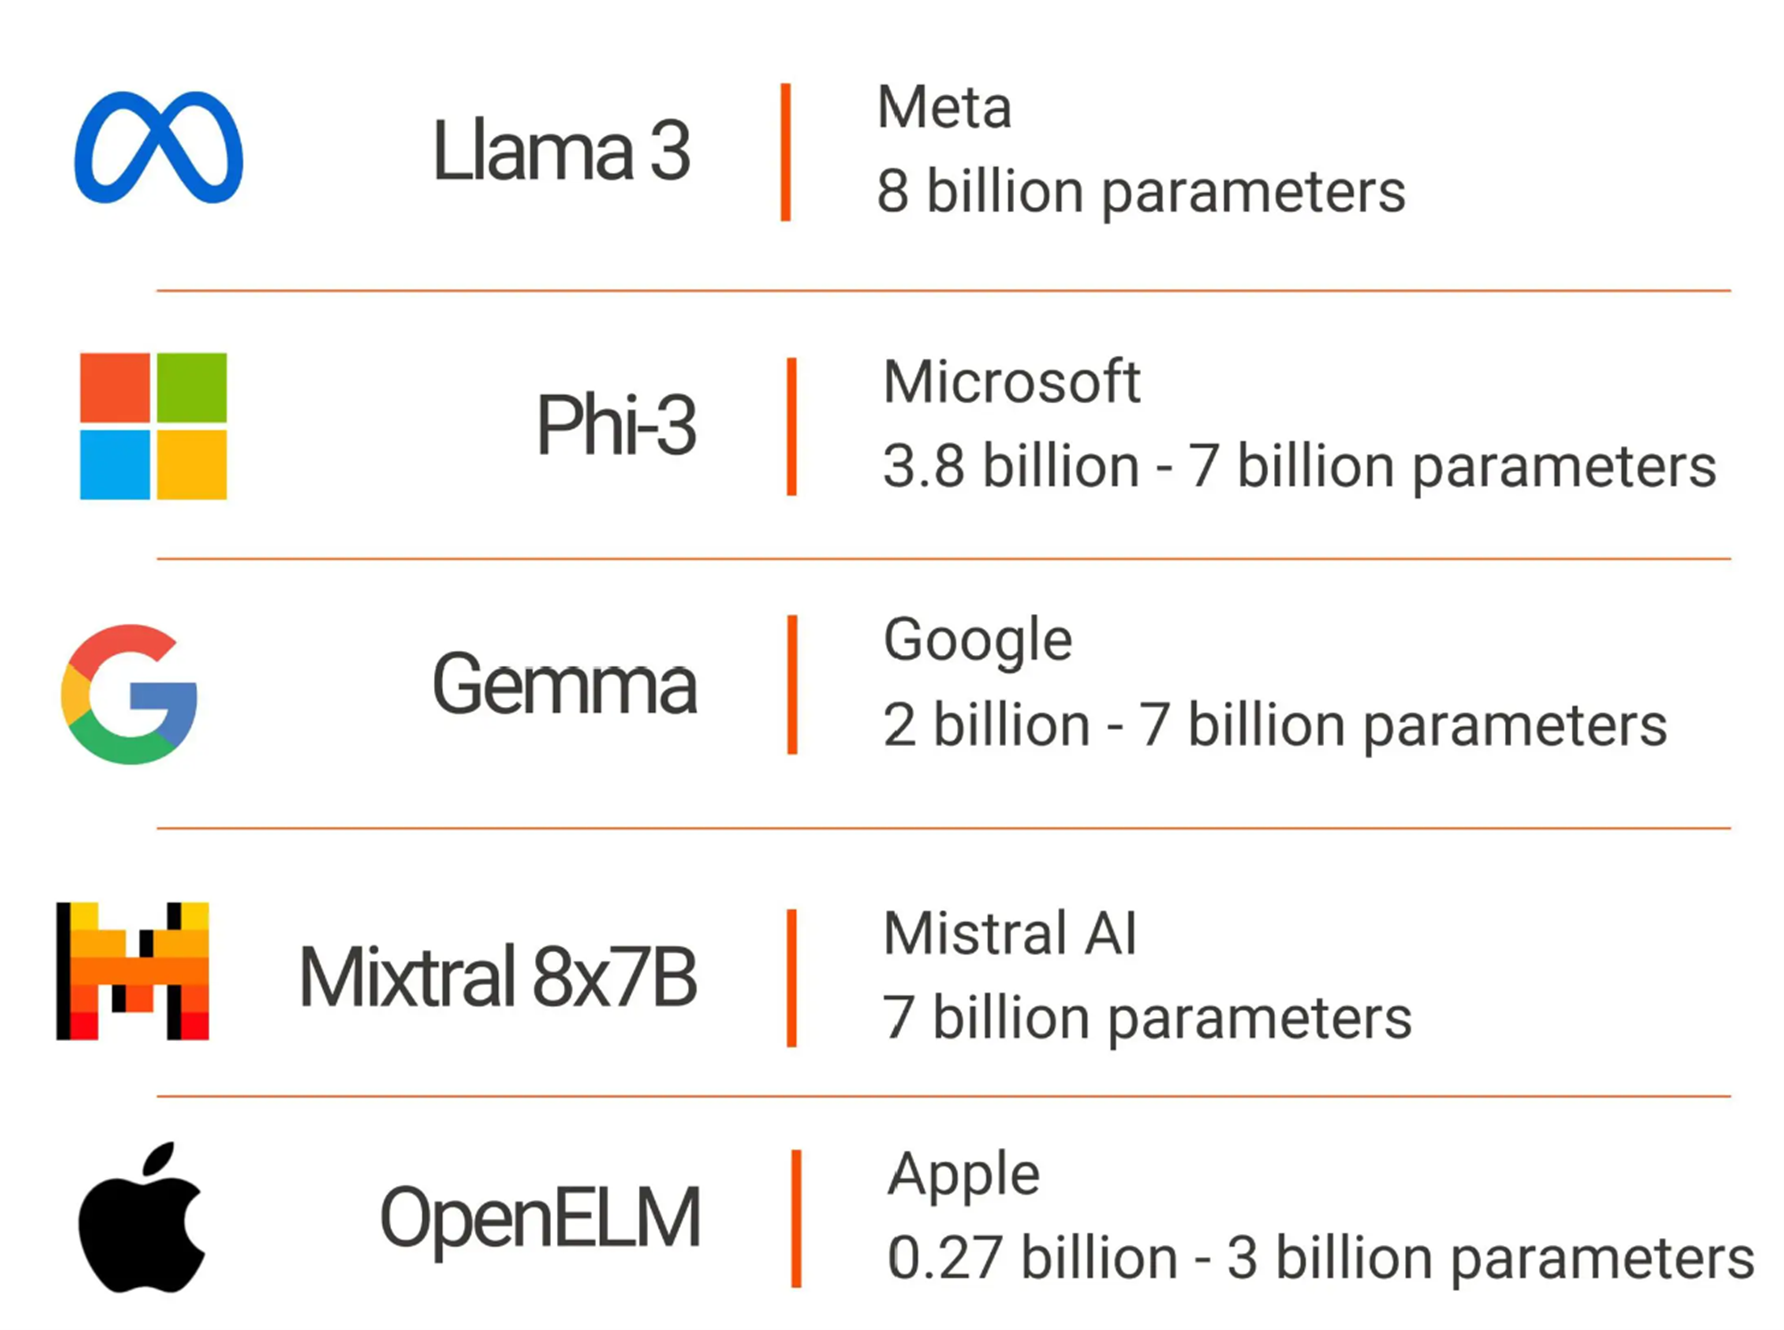
- DistilBERT, Gemma, GPT-4o mini 등

### (3) sLM의 장점
- 프라이버시: 로컬에서 실행될 수 있다.
    - 기업 내부 문서 등을 다룰 때 오프라인에서 작동할 수 있게 sLM이 사용됨.
- 비용 절감: 학습/추론에 필요한 리소스가 적어 비용이 낮다.
    - sLM은 노트북에서도 실행할 수 있다.
- 효율성/맞춤화: 특정 작업에 최적화되기 좋다. 실시간 처리에서 높은 성능을 보인다.

### (4) sLM의 한계
1. 편향
2. 제한된 일반화: 지식 부족
3. 환각
4. 성능/용량: LLM보다는 당연히 부족할 수밖에

- Fine-tuning/Specialization: 특정 분야에서는 LLM보다 정확하게
- Knowledge Distillation: LLM의 고품질 답변을 sLM가 학습하게
- RAG: 외부에서 검색해서 보완하기
- Hybird Inference: sLM + LLM
- 양자화, 가지치기

### (5) LLM과 sLM의 결합(결합 추론)
- sLM이 못하는 부분만 LLM에게 도움 받아 해결하기
- sLM이 먼저 풀고, 점수를 매긴 후, 어려운 부분을 LLM이 해결한다.
- 필요할 때만 LLM을 쓰기 때문에 토큰 사용량을 최대 90% 절약할 수 있다.

# 2. 생성 모델
## 2-1. 분류 모델 VS 생성 모델

### (1) Generative Model
- 학습 데이터의 분포를 따르는 유사한 데이터를 생성하는 모델
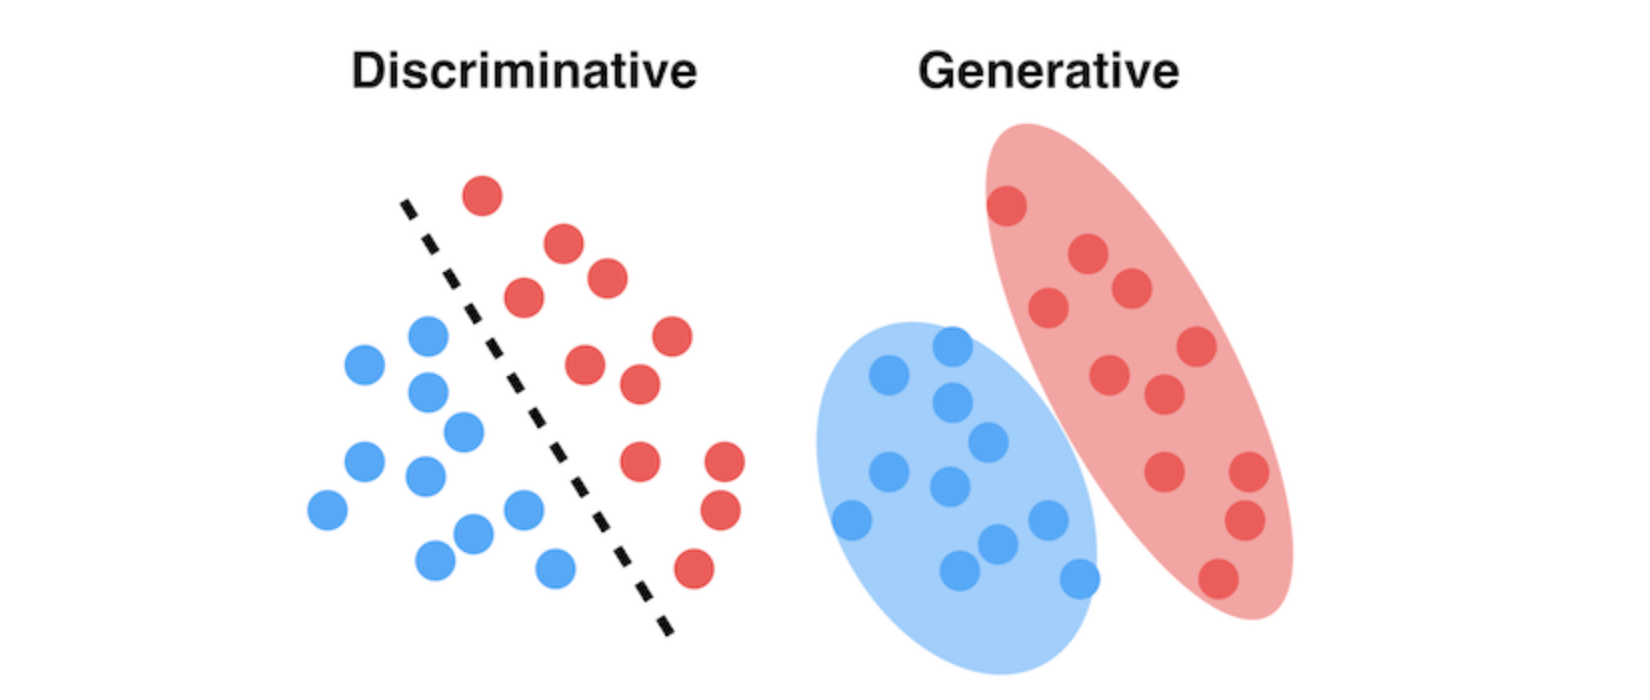
- 분류 모델이 label을 중요시했다면, 생성 모델은 레이블 지정에 관심이 없다.
- 생성 모델은 **입력 데이터의 확률 분포 P(x)**를 중요시한다!!

### (2) 생성 모델의 분류
- Explicit density Model: 학습 데이터 분포 기반 생성
    1. Tractable Density: 확률분포를 직접 표현하고 likelihood를 계산할 수 있는 경우
    2. Approximate Density: 정확한 likelihood 계산이 어려울 때
- Implicit density Model: 학습 데이터 분포와 무관하게

## 2-2. AE, VAE
### (1) AE
- Auto Encoder
- 입력과 동일한 출력을 만드는 게 목적이다.
- 차원 축소, 특징 추출, 노이즈 제거, 이상치 탐지, 데이터 복원 등

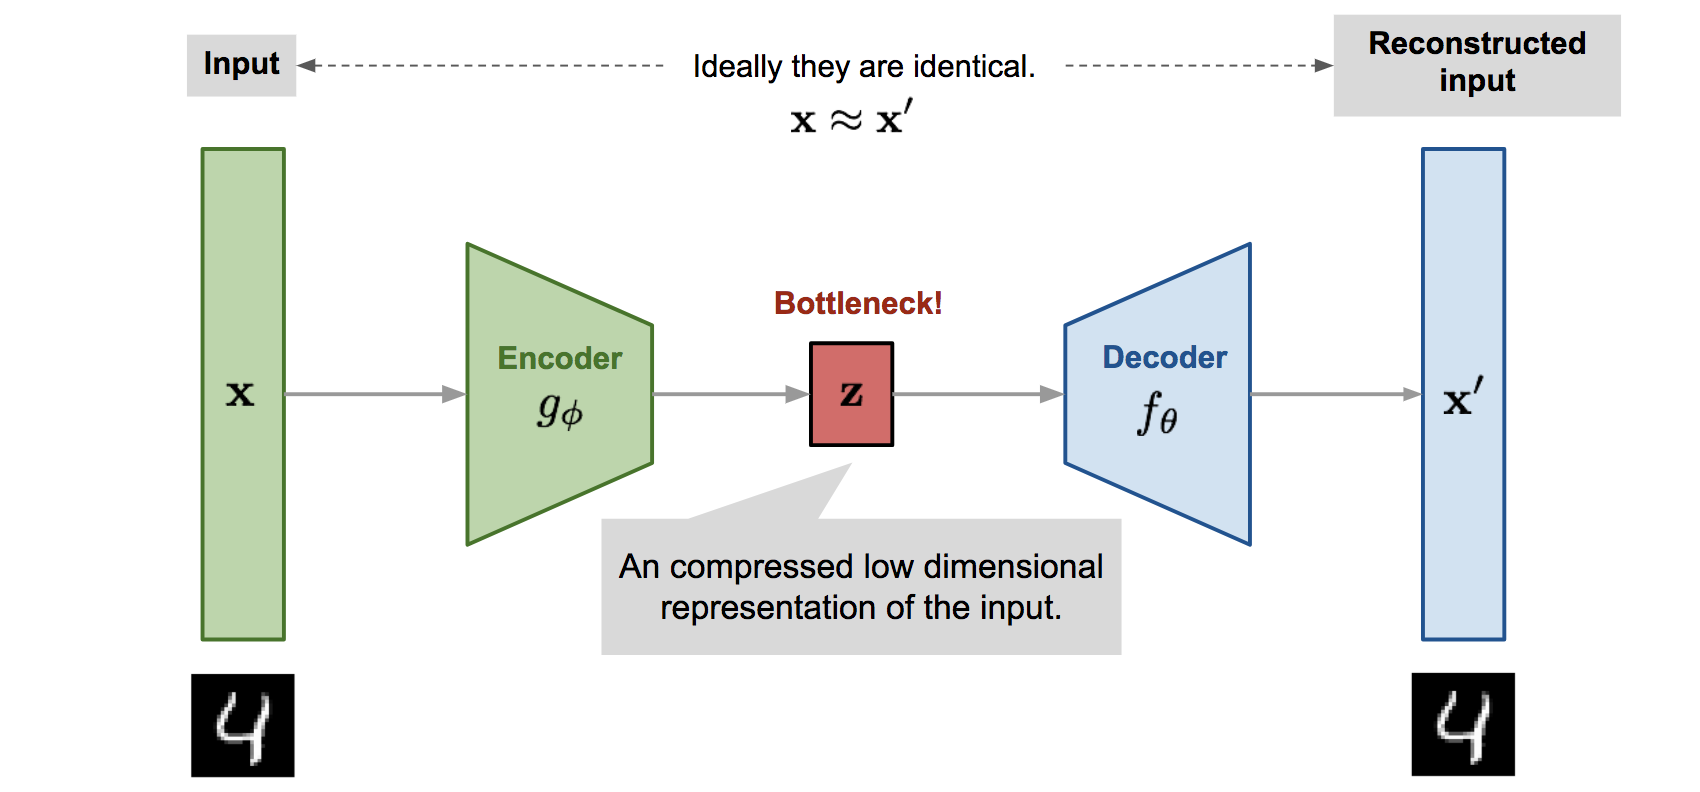

1. Encoder($g_\phi$)
    - 고차원 X를 잠재 표현 Z로 변환하는 네트워크
    - $\mathbf{z}=g_\phi(\mathbf{x})$
    - z: Latent Vector, 중요 정보가 압축되어 있다.
    - 차원 축소 했기 때문에 목적은 달성했지만, 잘 되었는지 확인하기 위해 Decoder를 사용한다.
2. Decoder($f_\theta$)
    - Z를 풀어 입력을 reconstruct하여 출력(X')하는 네트워크
    - $\mathbf{x'}=f_\theta(\mathbf{z})=f_\theta(g_\phi(\mathbf{x}))$
    - Latent Vector(특징이 담겨 있음)를 원래대로 복원한다.

> X와 X'가 같아지도록 훈련

### (2) VAE
- Variational Auto Encoder
- 랜덤 노이즈에서 원하는 영상을 얻어보자!
- 데이터를 latent space로 인코딩하고, 다시 디코딩하여 원본과 유사한 결과를 생성하는 방식
- 이미지/텍스트 생성, 신호 처리, 이미지 보간

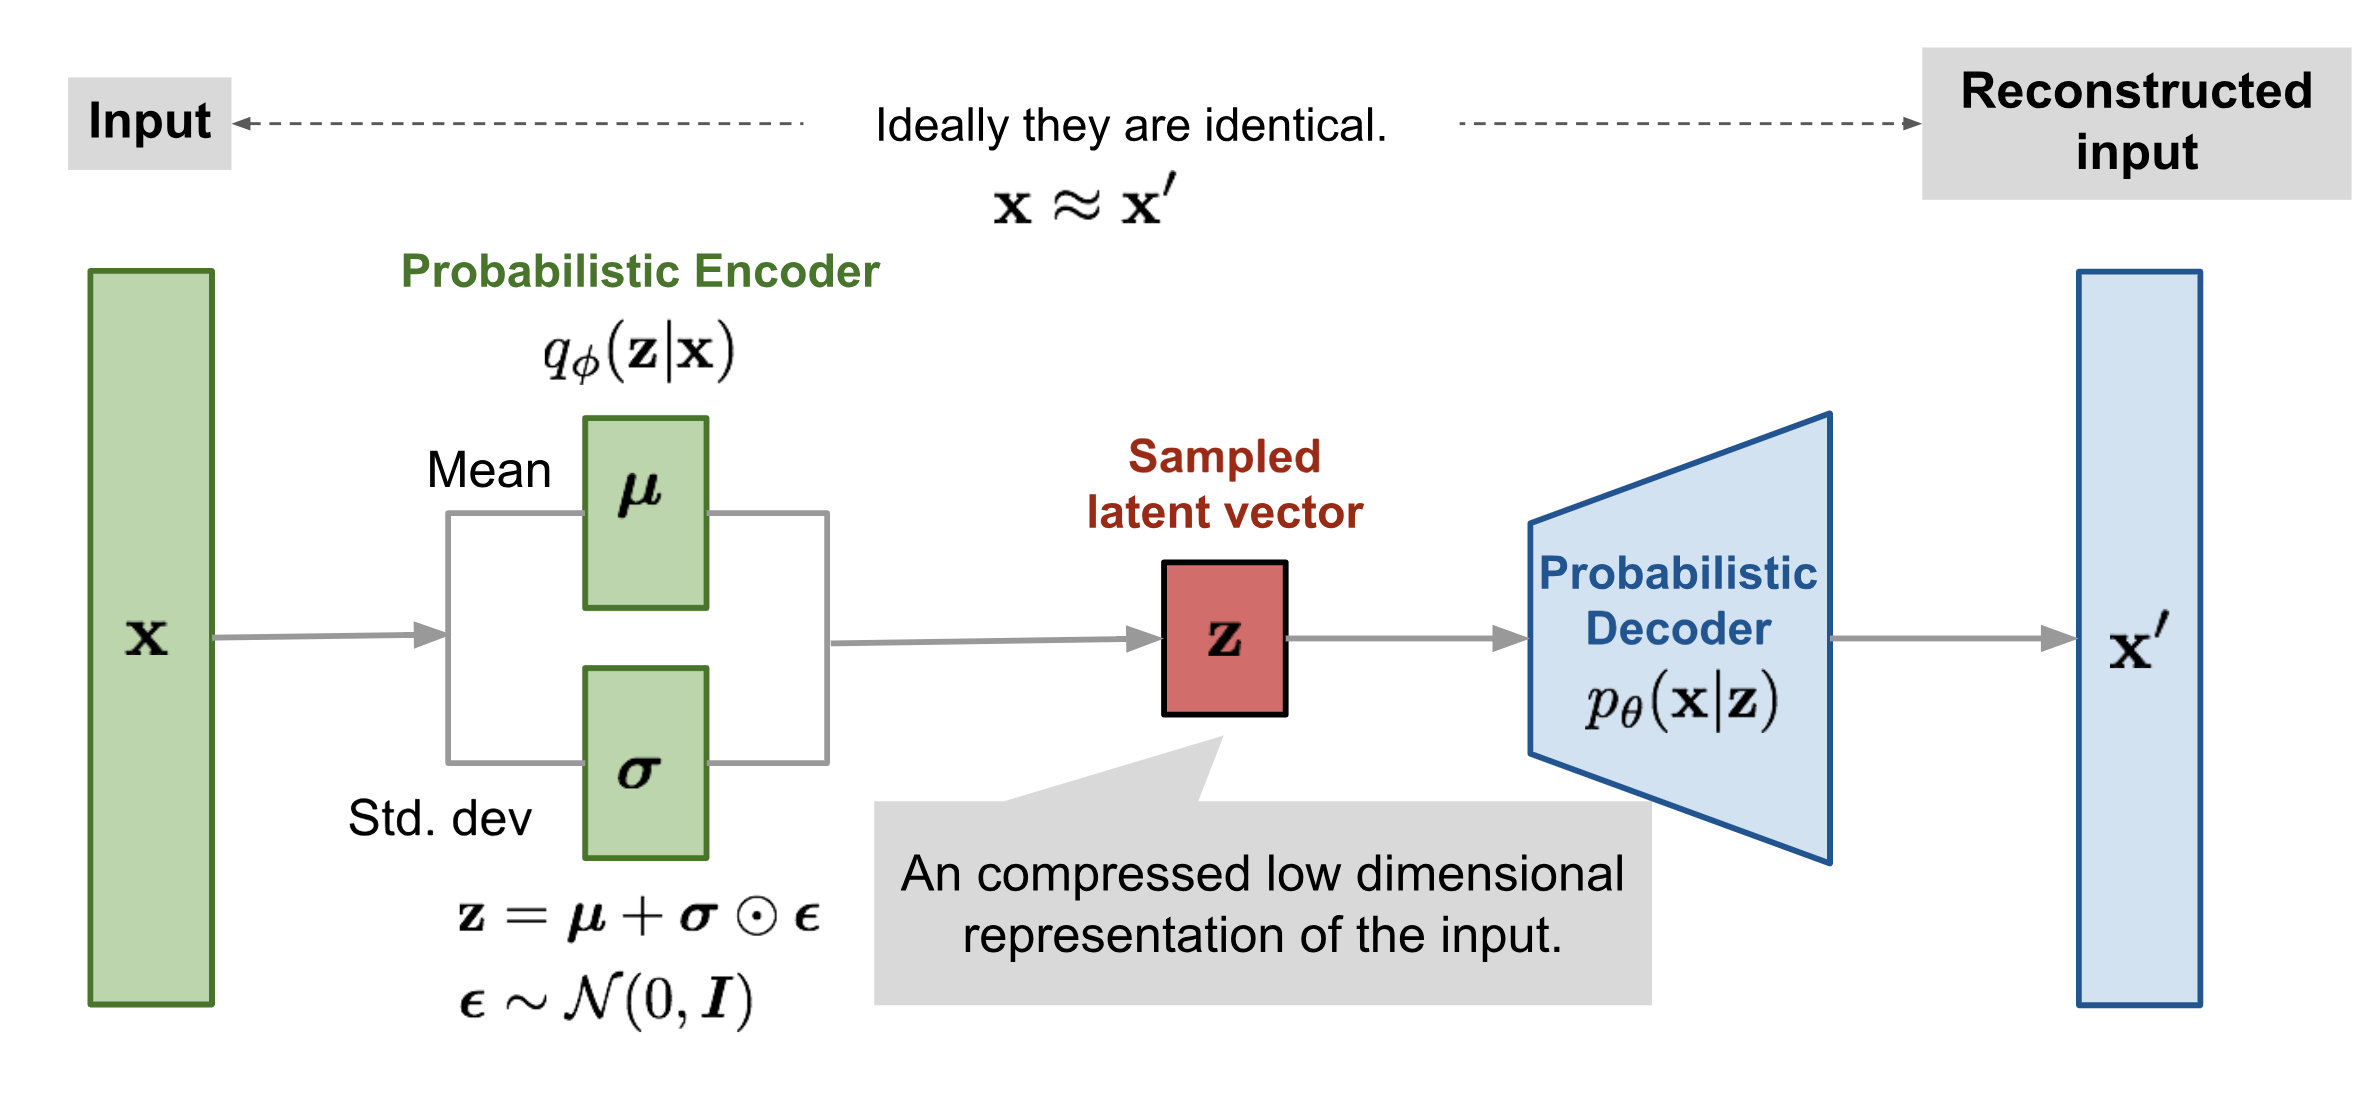

1. Encoder($q_\phi$)
    - 고차원 $\mathbf{x}$를 분포(평균: $\mu$, 표준편차: $\sigma$)로 변환하는 네트워크
    - input으로부터 잠재 변수의 평균, 표준편차 예측
    - $\epsilon$: 정규분포에서 샘플링된 잡음. 이를 통해 Reparameterization trick 수행
2. Decoder($p_\theta$)
    - 잠재 공간의 점 z로부터 확률적 복원하여 x' 생성

### (3) AE vs. VAE
- AE: Encoder가 핵심. 잠재 코드 값이 특정 값
- VAE: Decoder가 핵심. 잠재 코드 값이 특정 가우시안 분포
    - 가우시안 확률 분포에 기반한 확률 값으로 잠재 코드 값을 나타낸다.
    - 중심으로 잘 뭉치는 걸 볼 수 있다. 원본 데이터 재생에는 VAE가 좋은 성능이다.
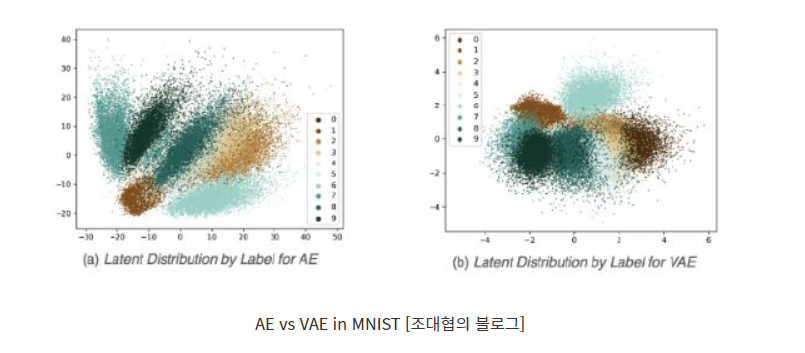

## 2-3. GAN
- Generative Adversarial Network
- 생성자와 판별자가 경쟁하면서 정교하게 수행할 수 있도록 만든다.
- 생성자: 진짜 분포에 가까운 가짜 분포 만들기
- 판별자: 가짜 분포 판별하기
- 실제 데이터의 분포에 가까운 데이터를 만드는 게 GAN의 목표다.
- 이미지 생성, 영상 합성

### (1) GAN의 구조
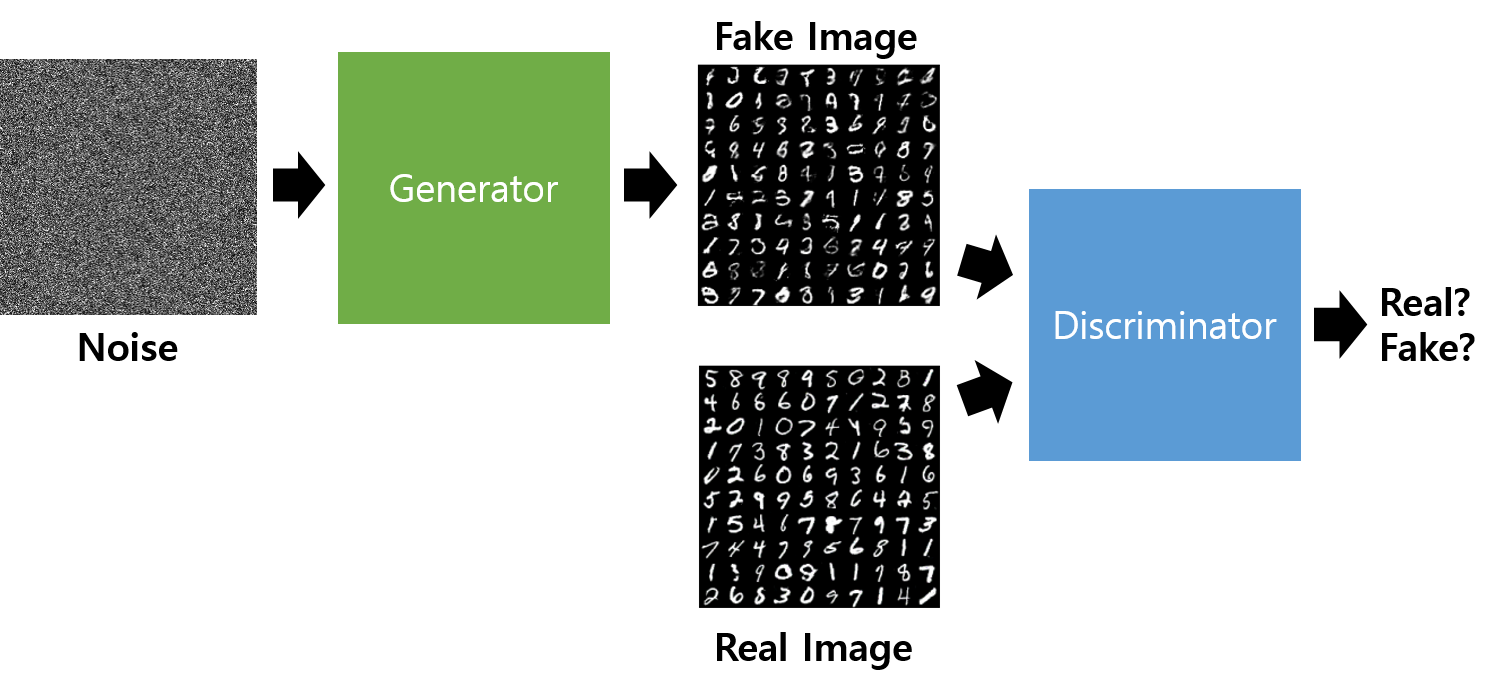

### (2) GAN 장단점
- `+` 진짜 같은 가짜 생성 가능
- `-` 학습 불안정: epoch가 커질수록 진동이 엄청 일어남

## 2-4. 확산 모델(Diffusion Model)
- 입력에 Noise를 추가하고, Noise를 제거함으로써 입력과 유사한 확률 분포를 가진 출력을 생성하는 모델
- 목표: Forward → Reverse 단계를 거친 결과를 입력과 유사하게 만들기

### (1) 순확산(Forward Diffusion Process)
- 데이터에 노이즈를 추가하는 과정: 원본을 무작위 노이즈로 변경시키기
- 많은 단계를 거치면, 원몬은 완전히 무작위 노이즈가 된다.
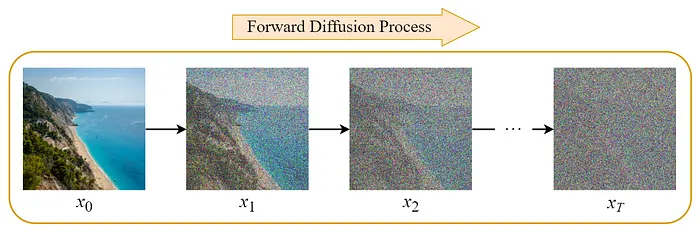

### (2) 역확산(Reverse Diffusion Process)
- 노이즈 데이터에서 원본 데이터를 재구성하는 과정
- 순확산의 결과물에서 노이즈를 제거하여 원본 복원하기
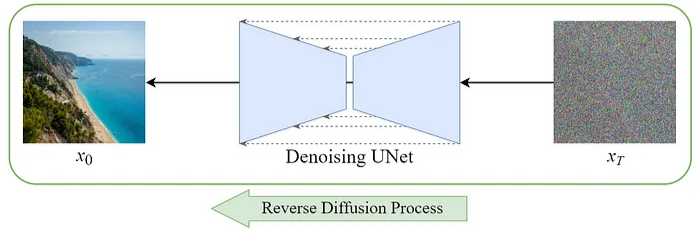